In [47]:
import tweepy
import random
import pandas as pd
import numpy as np
import json
import scipy as sp
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 1. Crawl Data From Twitter 

#### 1.1 API Pool

In [3]:
# API_1
consumer_key = 'sFfxIMNISwzV0Bg5NFZG5TjVn'
consumer_secret = 'LSTEE4tRlKCeRp7eIyqhhNRPifNBviNbkg8hJbAD0uuvUM20vZ'
access_token = '1437456125377531907-ZrtCOm4hxiG7GRTCZA92RwYPXQtYdo'
access_token_secret = 'UEMDlqKnS69NVi8zCyAsoURLVT7lVVVRMZ2HM3OCAGA3C'

In [4]:
# API_2
consumer_key = 'xuSdye0ccTn1U6LiMWZ2WPpYq'
consumer_secret = 'C2tQQK3td5juZzCDTwXZCfh7kGgrlF9E3Fhx22cWsK9gl2lPId'
access_token = '1437456125377531907-M1IvRllzju2ZYhjp8sQVRrNYK3TjTs'
access_token_secret = 'poSxunOs2VxvmZoXmrMjfq4wX8kzBCXYslautoIiEZiMG'

In [5]:
# API_3
consumer_key = 'AvdLoY5lcMJIi7UoWLIuJWXN7'
consumer_secret = '6IJicDNvXOHtXJR3fOB7iei3fhWSIxXaHswcfrJRFnhDk3FFog'
access_token = '1437456125377531907-MMCeDFxrRbcCcvh6x2yKiYtt7aB2BF'
access_token_secret = 'eSVTEvTxS00JDhZdDH9SMxVGHo8Oak2plyXDIBm6Wdk7c'

In [6]:
# API_4
consumer_key = '0cvqWqg4f6cY2hM1MIQgf2Y10'
consumer_secret = 'BTmwHKsp8XoHMUHdpCAStgUbQxmh60iwv0vG4JVjKoq7c7nGdY'
access_token = '1437456125377531907-BLxFnZsNxTLyvhdLwhddcebevL66eU'
access_token_secret = 'e6ggCITDJno2YtrNDuMJL2lN3m74n4Kk2EJx4lihW5rYF'

In [7]:
# API_5
consumer_key = '3cFWSvpxOPZQvu9F7qtQ3K3uD'
consumer_secret = '2D4998KaOL7tPL8MwX41p76BHuhZOfncY6jlPx3ZFfVv6g5JY3'
access_token = '1437456125377531907-PlKEkyQAFtuT7K9XjhKQl4D7JZvOYt'
access_token_secret = 'N5AwJQnDjf29ahCsKHpFI4uweRmndbQhCxMXAhRIEOh7G'

In [8]:
# Input the key and token
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# Get the auth of API
api = tweepy.API(auth)

#### 1.2 Get the info from Twitter

In [10]:
# get the specific info of user (optional)
def get_specific_info(sc_name):
    # get the info from get_user
    info_ori = api.get_user(str(sc_name))
    info_need = ["id","name","screen_name","location","description","url","followers_count"\
                 ,"friends_count","created_at","favourites_count"]
    
    # find the attribute which is useful
    info_id = info_ori.id
    info_name = info_ori.name
    info_screen_name = "@" + info_ori.screen_name
    info_location = info_ori.location
    info_description = info_ori.description
    info_url = info_ori.url
    info_followers_count = info_ori.followers_count
    info_friends_count = info_ori.friends_count
    info_created_at = info_ori.created_at
    info_favourites_count = info_ori.favourites_count
    
    # return a info_list containing the information
    info_list = [info_id,info_name,info_screen_name,info_location,info_description,info_url,info_followers_count\
                ,info_friends_count,info_created_at,info_favourites_count] 
    return info_list

In [11]:
# get the friends_sc_name of user
def get_friends_info(sc_name,friends_count):
    start_friends = api.friends(screen_name = sc_name, count = friends_count)
    start_friends_scname_list = ["@" + str(i.screen_name) for i in start_friends]
    return start_friends_scname_list

In [12]:
# get the followers_sc_name of user
def get_followers_info(sc_name,followers_count):
    start_friends = api.followers(screen_name = sc_name, count = followers_count)
    start_friends_scname_list = ["@" + str(i.screen_name) for i in start_friends]
    return start_friends_scname_list

In [16]:
# create nodes dict(40+15*6=130) 
# Remark!!!: initially I try to generate the ramdomly, but the result if awful, so I select after each iteration.
nodes_dict = {"@Tesla":1,"@teslacn":2,"@TeslaCharging":2,"@elonmusk":2,"@SpaceX":2,"@ElectricJen":2,"@TSLATNA":3,"@arctechinc":3\
             ,"@mayemusk":3,"@SavedTesla":3,"@cleantechnica":3,"@NASA":3,"@NASAMars":3,"@TeslaOwnersUK":3,"@OCTeslaClub":3,"@inspiration4x":3\
             ,"@NASAEarth":4,"@JimFree":4,"@KathyLueders":4,"@Space_Station":4,"@RickShadyac":4,"@rookisaacman":4,"@AstroKomrade":4,"@Astro_Bones":4\
             ,"@Astro_Sabot":5,"@AstroBehnken":5,"@aimeekhall":5,"@Peter_J_Beck":5,"@ThisGuyFuchz":5,"@POTUS45":5,"@Astro_Box":5,"@TeslaPodcast":5\
             ,"@HeartLandMS":6,"@TransAmazon25":6,"@neiltyson":6,"@exec_sum":6,"@woodhaus2":6,"@Schedaero":6,"@RobRangers":6,"@NASAhistory":6}
nodes_list = [node[0] for node in nodes_dict.items()]
nodes_list_plus = ['@foreman_mike',"@pluginamerica", '@ivan_mks63', '@AstroVicGlover', '@AstroIronMike', '@Astro_Doug', '@NASA_Johnson', '@JCarpenter219', '@WaltKozlowski', '@forrester', '@mktggurl', '@jayjump', '@dftonline', '@aisdata', '@WeHaveMECO', '@callaghannz', '@vkhosla', '@TechCrunch', '@NatGeo', '@FreezingFinTake', '@WallStreetOasis', '@SecYellen', '@SaraEisen', '@Foot_Guns', '@GritGrowthCap', '@stevenmnuchin1', '@VP45', '@SBAgov', '@KellyannePolls', '@USDOT', '@AmbNikkiHaley', '@CaptMarkKelly', '@astro_aggie', '@Pago', '@GSK', '@FranciscoFMK', '@spacenation', '@waitbutwhy', '@OpenAI', '@munster_gene', '@jesselivenomore', '@ElectrekCo', '@LucidMotors', '@pastorbryanc', '@cubaz45', '@rcrawford10000', '@corey_glover3', '@bethallan1976', '@fredandkimlevi', '@DanielleCBS12', '@lourdesgnavarro', '@MooreFound', '@LedgeKing', '@earthalliance', '@LucianoHuck', '@StarTalkSports', '@Burghound', '@republicofmath', '@WhoopiGoldberg', '@kevinmitnick', '@sciencecomedian', '@BullishRippers', '@CitronResearch', '@coingawd', '@jimcramer', '@TrungTPhan', '@WSJ', '@KingJames', '@WIRED', '@verge', '@Jalopnik', '@thirdmanrecords', '@SaxonAir', '@flystarflight', '@LOXOXFEGTK', '@privatejetsdl', '@advancedair_llc', '@sentientjet', '@actuallyashley5', '@CCISDLearnTech', '@saomiller03', '@MrsRodriguez4th', '@TerriMH57', '@TCRWP', '@JimBridenstine', '@DavaExplorer', '@Commercial_Crew', '@TodayIn1968', '@Cmd16Duke', '@NASApeople']
nodes_list += nodes_list_plus
outdegree_dict = {}
# test to ensure no duplicate 
print(len(nodes_list))

130


In [ ]:
# Find friends
# Remark!!!: we should change the API while crawl 15 nodes.
for node in nodes_list[:]:
    outdegree_dict[node] = get_friends_info(node,100)

In [18]:
# get the new_outdegree_dict without useless nodes
outdegree_dict_copy = outdegree_dict
new_outdegree_dict = {}
for node in outdegree_dict_copy.items():
    tmp_list = []
    for node2 in node[1]:
        if node2 in nodes_list:
            tmp_list.append(node2)
    new_outdegree_dict[node[0]] = tmp_list
print(len(new_outdegree_dict))

#### 1.3 Save the data to txt in the style of dict

In [19]:
# store to txt file 
js = json.dumps(new_outdegree_dict)
file = open('project_nodes_dict_data.txt', 'w')
file.write(js)
file.close()

In [21]:
# read txt to get dict
file = open('project_nodes_dict_data.txt', 'r')
js = file.read()
dict_open = json.loads(js)
file.close()

In [25]:
# show the data
graph_matrix = dict_open
print(graph_matrix)

{'@teslacn': ['@woodhaus2', '@TeslaCharging', '@TeslaPodcast', '@mayemusk', '@WSJ', '@cleantechnica', '@arctechinc', '@SavedTesla', '@ElectrekCo', '@SpaceX', '@Tesla', '@elonmusk'], '@TeslaCharging': ['@OCTeslaClub', '@TeslaOwnersUK', '@teslacn', '@Tesla', '@elonmusk'], '@elonmusk': ['@inspiration4x', '@rookisaacman', '@cleantechnica', '@AstroVicGlover', '@teslacn', '@OpenAI', '@JimBridenstine', '@neiltyson', '@NatGeo', '@mayemusk', '@Space_Station', '@NASA', '@waitbutwhy'], '@SpaceX': ['@inspiration4x', '@rookisaacman', '@AstroVicGlover', '@JimBridenstine', '@AstroBehnken', '@POTUS45', '@waitbutwhy', '@Space_Station', '@Astro_Doug', '@NASAMars', '@Commercial_Crew', '@NASA_Johnson', '@NatGeo', '@elonmusk', '@Tesla', '@NASA', '@neiltyson'], '@ElectricJen': ['@SpaceX', '@TSLATNA'], '@TSLATNA': ['@ElectricJen', '@rookisaacman', '@inspiration4x', '@TeslaCharging', '@NASAMars', '@astro_aggie', '@Astro_Sabot'], '@arctechinc': ['@TeslaCharging', '@teslacn', '@NASA', '@SpaceX', '@Tesla', '@elo

### 2. Visualize Graph With networkx

In [30]:
# get the relation using dataframe
g = graph_matrix
g = {k: [v.strip() for v in vs] for k, vs in g.items()}
edges = [(a, b) for a, bs in g.items() for b in bs]
df = pd.DataFrame(edges)
df.columns = (["strat_node","end_node"])
df

,strat_node,end_node
0,@teslacn,@woodhaus2
1,@teslacn,@TeslaCharging
2,@teslacn,@TeslaPodcast
3,@teslacn,@mayemusk
4,@teslacn,@WSJ
...,...,...
483,@Commercial_Crew,@elonmusk
484,@Commercial_Crew,@CaptMarkKelly
485,@Commercial_Crew,@NASAhistory
486,@NASApeople,@KathyLueders


#### 2.1 Create directed graph

In [34]:
# create directed graph
G = nx.DiGraph()

# generate the list of nodes
nodes_list = df["strat_node"].unique().tolist()
edges_lit = np.array(df).tolist()

# add the edges/relation directed into graph
for edge in edges_lit:
    G.add_edge(edge[0], edge[1])
    
G

#### 2.2 Draw/Visualize graph

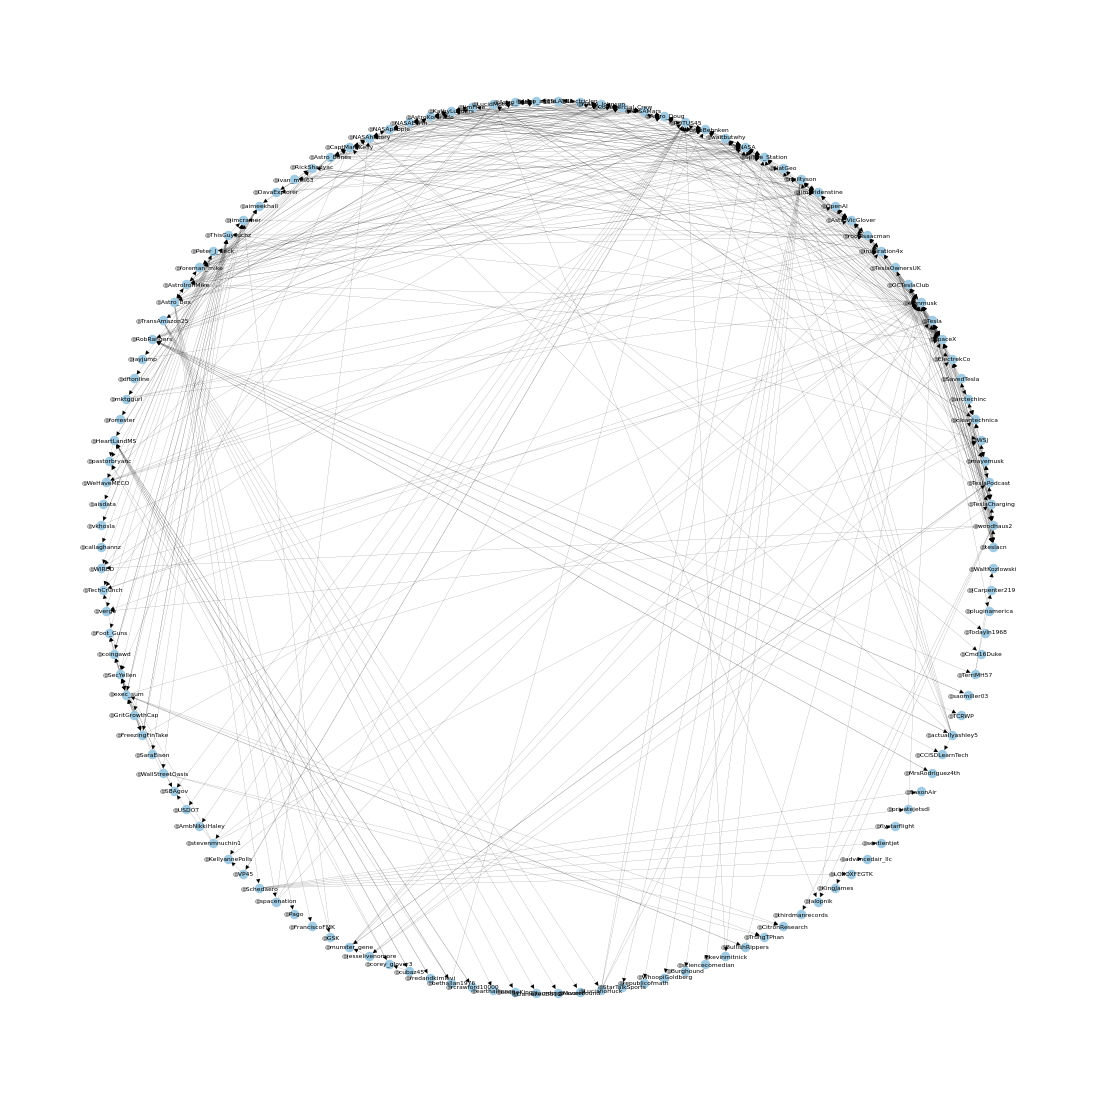

In [35]:
# shell_layout visualization
def draw_pic_shell_layout(G):
    plt.figure(figsize=(15,15)) 
    pos = nx.shell_layout(G) # There is spring_layout,spectral_layout,shell_layout,
    options = {
    "node_color": "#A0CBE2",
    "node_size": 90,
    "linewidths": 0,
    "width": 0.1,
    "with_labels":True,
    "font_size":6,
    }
    nx.draw(G,pos,**options)
    plt.savefig("shell_layout.jpg",dpi=300)
    plt.show()
draw_pic_shell_layout(G)

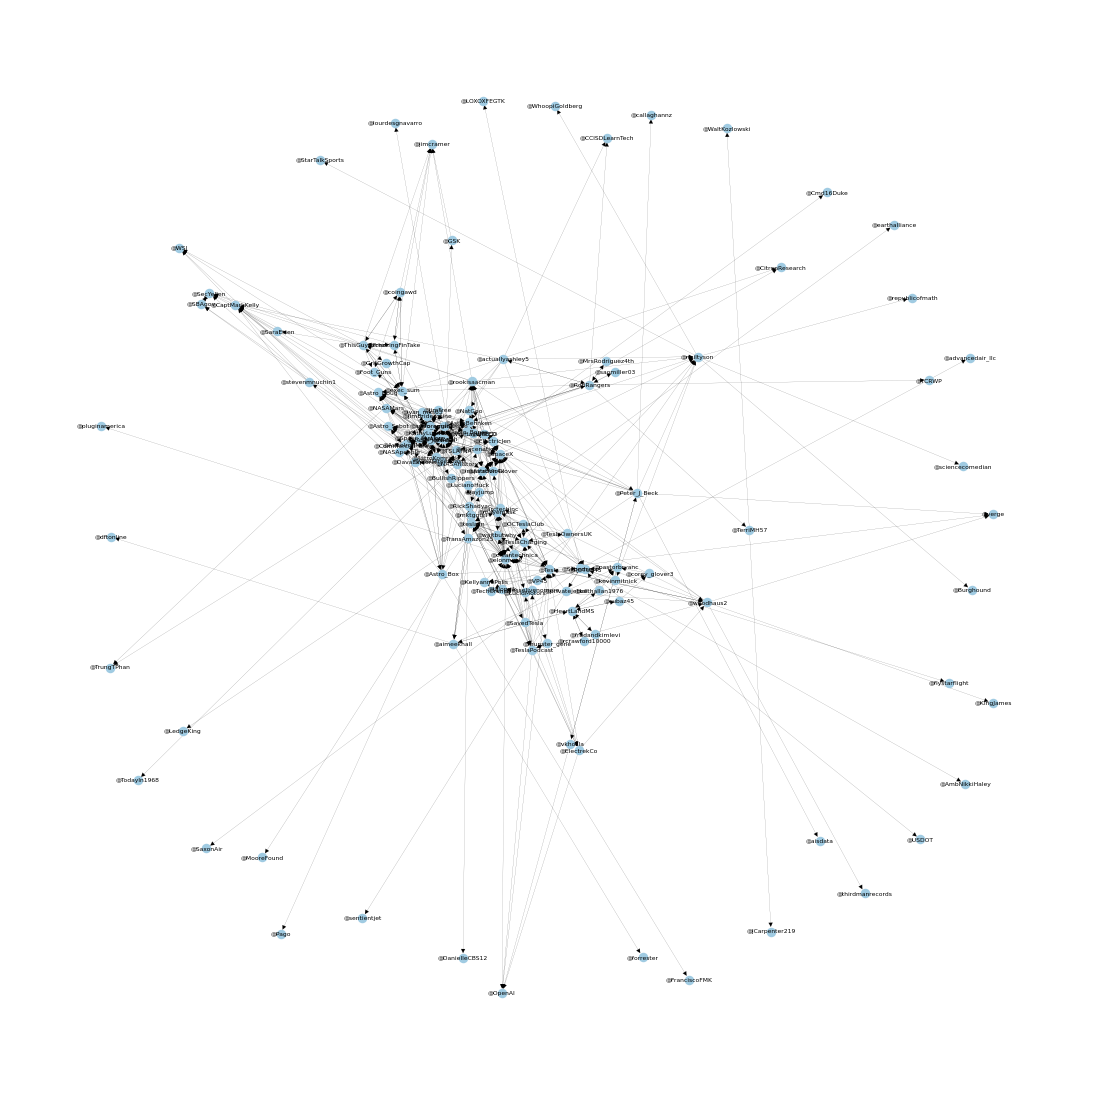

In [38]:
# shell_layout visualization with labels
def draw_pic_spring_layout(G,with_labels,seed):
    plt.figure(figsize=(15,15)) 
    pos = nx.spring_layout(G,seed = seed) # There is spring_layout,spectral_layout,shell_layout,
    options = {
    "node_color": "#A0CBE2",
    "node_size": 90,
    "linewidths": 0,
    "width": 0.1,
    "with_labels":with_labels,
    "font_size":6,
    }
    nx.draw(G,pos,**options)
    plt.savefig("spring_layout_with_labels.jpg",dpi=300)
    plt.show()
draw_pic_spring_layout(G,True,66)

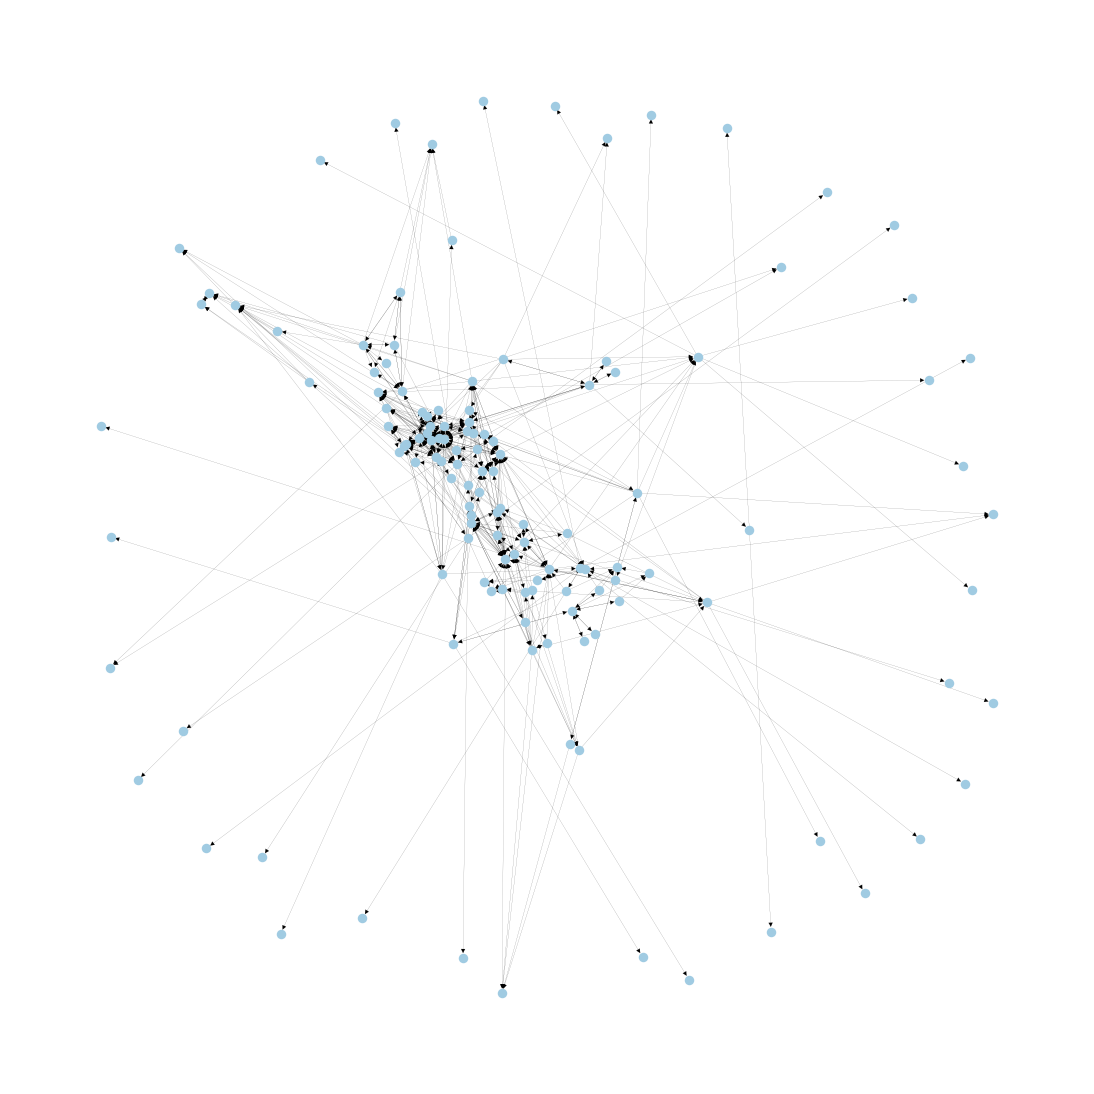

In [39]:
# shell_layout visualization without labels
def draw_pic_spring_layout(G,with_labels,seed):
    plt.figure(figsize=(15,15)) 
    pos = nx.spring_layout(G,seed = seed) # There is spring_layout,spectral_layout,shell_layout,
    options = {
    "node_color": "#A0CBE2",
    "node_size": 90,
    "linewidths": 0,
    "width": 0.1,
    "with_labels":with_labels,
    "font_size":6,
    }
    nx.draw(G,pos,**options)
    plt.savefig("spring_layout_without_labels.jpg",dpi=300)
    plt.show()
draw_pic_spring_layout(G,False,66)

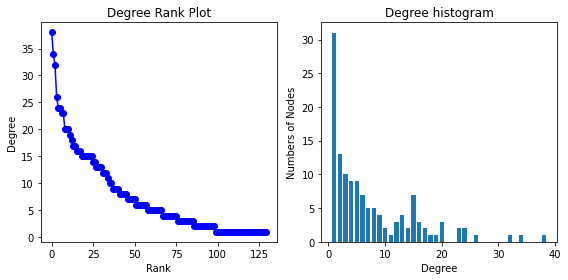

In [41]:
# Degree visualization
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

fig = plt.figure("Degree of a random graph", figsize=(8, 4))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(axgrid[:1, :1])
ax2 = fig.add_subplot(axgrid[:1, 1:])

ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Numbers of Nodes")

fig.tight_layout()
plt.savefig("Degree Visualization.jpg",dpi=100)
plt.show()

### 2. Network Measures Calculation

#### 2.1 outdegree and indegree distribution

In [43]:
# get the node list
node_list = [i for i in nx.nodes(G)]

In [44]:
# generate adjacency matrix
import scipy as sp
adj_matrix = np.array(nx.adjacency_matrix(G).todense())

In [45]:
# outdegree
outdegree_dict = {}
for i in range(len(node_list)):
    outdegree_dict[node_list[i]] = sum(adj_matrix[i])
# indegree
indegree_dict = {}
for i in range(len(node_list)):
    indegree_dict[node_list[i]] = sum(adj_matrix.T[i])

average of outdegree 3.753846153846154
sum of outdegree 488
average of indegree 3.753846153846154
sum of indegree 488


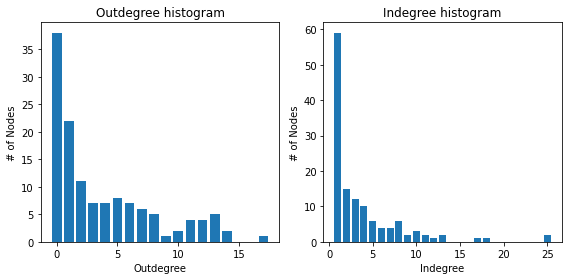

In [46]:
# outdegree and indegree
fig = plt.figure("Degree of a random graph", figsize=(8, 4))

axgrid = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(axgrid[:1, :1])
ax1.bar(*np.unique(list(outdegree_dict.values()), return_counts=True))
ax1.set_title("Outdegree histogram")
ax1.set_xlabel("Outdegree")
ax1.set_ylabel("# of Nodes")
print("average of outdegree",np.average(list(outdegree_dict.values())))
print("sum of outdegree",np.sum(list(outdegree_dict.values())))

ax2 = fig.add_subplot(axgrid[:1, 1:])
ax2.bar(*np.unique(list(indegree_dict.values()), return_counts=True))
ax2.set_title("Indegree histogram")
ax2.set_xlabel("Indegree")
ax2.set_ylabel("# of Nodes")
print("average of indegree",np.average(list(indegree_dict.values())))
print("sum of indegree",np.sum(list(indegree_dict.values())))

fig.tight_layout()
plt.savefig("outdegree_indegree_distribution_histogram.jpg",dpi=100)
plt.show()

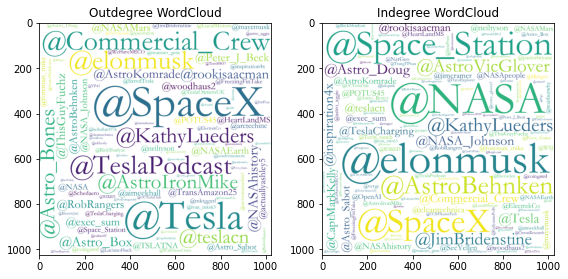

In [48]:
# outdegree and indegree
fig = plt.figure("Degree of a random graph", figsize=(8, 4))
axgrid = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(axgrid[:1, :1])
ax2 = fig.add_subplot(axgrid[:1, 1:])
# set styly
wc = WordCloud(width=1024, height=1024, background_color='white',
               font_path='STKAITI.TTF', max_font_size=200, random_state=50)
wc.generate_from_frequencies(outdegree_dict)
ax1.set_title("Outdegree WordCloud")
ax1.imshow(wc)

wc.generate_from_frequencies(indegree_dict)
ax2.set_title("Indegree WordCloud")
ax2.imshow(wc)

fig.tight_layout()
plt.savefig("outdegree_indegree_distribution_WordCloud.jpg",dpi=200)
plt.show()

#### 2.2 Clustering Coefficient

In [51]:
# Local Clustering Coefficient
local_cluster_coefficient_dict = nx.clustering(G)

average of outdegree 0.20947253691777326
sum of outdegree 27.231429799310526


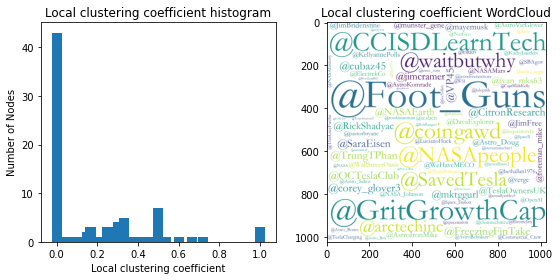

In [52]:
fig = plt.figure("", figsize=(8, 4))

axgrid = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(axgrid[:1, :1])
bar_width = 0.05
ax1.bar(*np.unique(list(local_cluster_coefficient_dict.values()), return_counts=True),bar_width)
ax1.set_title("Local clustering coefficient histogram")
ax1.set_xlabel("Local clustering coefficient")
ax1.set_ylabel("Number of Nodes")
print("average of outdegree",np.average(list(local_cluster_coefficient_dict.values())))
print("sum of outdegree",np.sum(list(local_cluster_coefficient_dict.values())))

ax2 = fig.add_subplot(axgrid[:1, 1:])
wc = WordCloud(width=1024, height=1024, background_color='white',
               font_path='STKAITI.TTF', max_font_size=200, random_state=50)
wc.generate_from_frequencies(local_cluster_coefficient_dict)
ax2.set_title("Local clustering coefficient WordCloud")
ax2.imshow(wc)

fig.tight_layout()
plt.savefig("Local Clustering Coefficient.jpg",dpi=100)
plt.show()

#### 2.3 outdegree and indegree centrality

average of outdegree centrality 0.029099582587954677
sum of outdegree centrality 3.782945736434108
average of indegree centrality 3.753846153846154
sum of indegree centrality 488


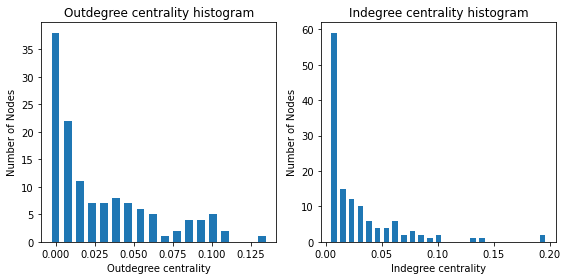

In [53]:
# centrality
out_degree_centrality_dict = nx.out_degree_centrality(G)
in_degree_centrality_dict = nx.in_degree_centrality(G)

fig = plt.figure("", figsize=(8, 4))

axgrid = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(axgrid[:1, :1])
bar_width = 0.005
ax1.bar(*np.unique(list(out_degree_centrality_dict.values()), return_counts=True),bar_width)
ax1.set_title("Outdegree centrality histogram")
ax1.set_xlabel("Outdegree centrality")
ax1.set_ylabel("Number of Nodes")
print("average of outdegree centrality",np.average(list(out_degree_centrality_dict.values())))
print("sum of outdegree centrality",np.sum(list(out_degree_centrality_dict.values())))

ax2 = fig.add_subplot(axgrid[:1, 1:])
bar_width = 0.005
ax2.bar(*np.unique(list(in_degree_centrality_dict.values()), return_counts=True),bar_width)
ax2.set_title("Indegree centrality histogram")
ax2.set_xlabel("Indegree centrality")
ax2.set_ylabel("Number of Nodes")
print("average of indegree centrality",np.average(list(indegree_dict.values())))
print("sum of indegree centrality",np.sum(list(indegree_dict.values())))


fig.tight_layout()
plt.savefig("outdegree and indegree centrality.jpg",dpi=100)
plt.show()

#### 2.4 katz_centrality

In [54]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
lambda_max = 0
for i in eigenvector_centrality.values():
    lambda_max = max(lambda_max,i)
print(lambda_max)

0.3372967273782477


In [55]:
katz_centrality_outgoing = nx.katz_centrality_numpy(G.reverse(),alpha = 2.9, beta = 1)

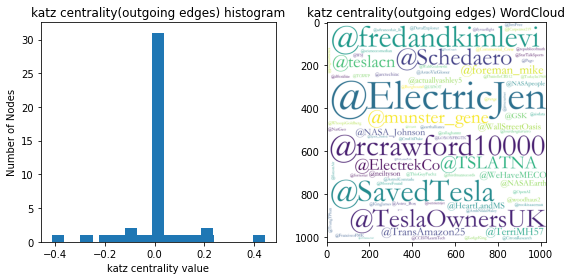

In [58]:
fig = plt.figure("", figsize=(8, 4))

axgrid = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(axgrid[:1, :1])
bar_width = 0.05
ax1.bar(*np.unique(list(katz_centrality_outgoing.values()), return_counts=True),bar_width)
ax1.set_title("katz centrality(outgoing edges) histogram")
ax1.set_xlabel("katz centrality value")
ax1.set_ylabel("Number of Nodes")

ax2 = fig.add_subplot(axgrid[:1, 1:])
wc = WordCloud(width=1024, height=1024, background_color='white',
               font_path='STKAITI.TTF', max_font_size=300, random_state=50)
wc.generate_from_frequencies(katz_centrality_outgoing)
ax2.set_title("katz centrality(outgoing edges) WordCloud")
ax2.imshow(wc)

fig.tight_layout()
plt.savefig("katz centrality(outgoing edges).jpg",dpi=100)
plt.show()

In [57]:
katz_centrality_incoming = nx.katz_centrality_numpy(G,alpha = 2.9, beta = 1)

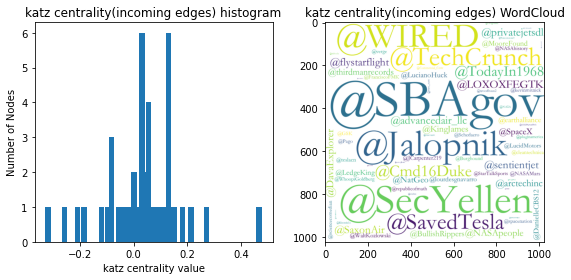

In [59]:
fig = plt.figure("", figsize=(8, 4))

axgrid = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(axgrid[:1, :1])
bar_width = 0.02
ax1.bar(*np.unique(list(katz_centrality_incoming.values()), return_counts=True),bar_width)
ax1.set_title("katz centrality(incoming edges) histogram")
ax1.set_xlabel("katz centrality value")
ax1.set_ylabel("Number of Nodes")

ax2 = fig.add_subplot(axgrid[:1, 1:])
wc = WordCloud(width=1024, height=1024, background_color='white',
               font_path='STKAITI.TTF', max_font_size=300, random_state=50)
wc.generate_from_frequencies(katz_centrality_incoming)
ax2.set_title("katz centrality(incoming edges) WordCloud")
ax2.imshow(wc)

fig.tight_layout()
plt.savefig("katz centrality(incoming edges).jpg",dpi=100)
plt.show()

#### 2.5 Pagerank

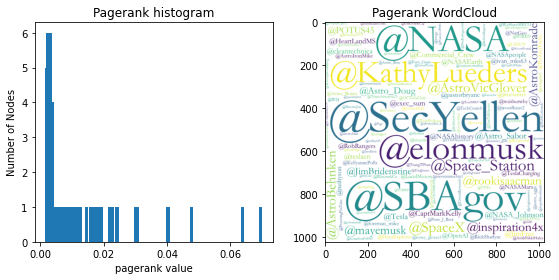

In [60]:
#Pagerank
pagerank = nx.pagerank(G, alpha=0.85,max_iter=100)

fig = plt.figure("", figsize=(8, 4))

axgrid = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(axgrid[:1, :1])
bar_width = 0.001
ax1.bar(*np.unique(list(pagerank.values()), return_counts=True),bar_width)
ax1.set_title("Pagerank histogram")
ax1.set_xlabel("pagerank value")
ax1.set_ylabel("Number of Nodes")

ax2 = fig.add_subplot(axgrid[:1, 1:])
wc = WordCloud(width=1024, height=1024, background_color='white',
               font_path='STKAITI.TTF', max_font_size=300, random_state=50)
wc.generate_from_frequencies(pagerank)
ax2.set_title("Pagerank WordCloud")
ax2.imshow(wc)

fig.tight_layout()
plt.savefig("pagerank.jpg",dpi=100)
plt.show()

#### 2.6 closeness

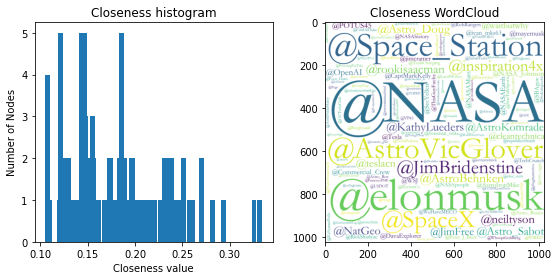

In [61]:
#closeness_centrality
closeness_centrality = nx.closeness_centrality(G)

fig = plt.figure("", figsize=(8, 4))

axgrid = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(axgrid[:1, :1])
bar_width = 0.005
ax1.bar(*np.unique(list(closeness_centrality.values()), return_counts=True),bar_width)
ax1.set_title("Closeness histogram")
ax1.set_xlabel("Closeness value")
ax1.set_ylabel("Number of Nodes")

ax2 = fig.add_subplot(axgrid[:1, 1:])
wc = WordCloud(width=1024, height=1024, background_color='white',
               font_path='STKAITI.TTF', max_font_size=300, random_state=50)
wc.generate_from_frequencies(closeness_centrality)
ax2.set_title("Closeness WordCloud")
ax2.imshow(wc)

fig.tight_layout()
plt.savefig("closeness_centrality.jpg",dpi=100)
plt.show()

#### 2.7 Simrank Similarity

In [62]:
similarity_dict = nx.simrank_similarity(G)

In [63]:
similarity_matrix = np.array([[similarity_dict[u][v] for v in G] for u in G])

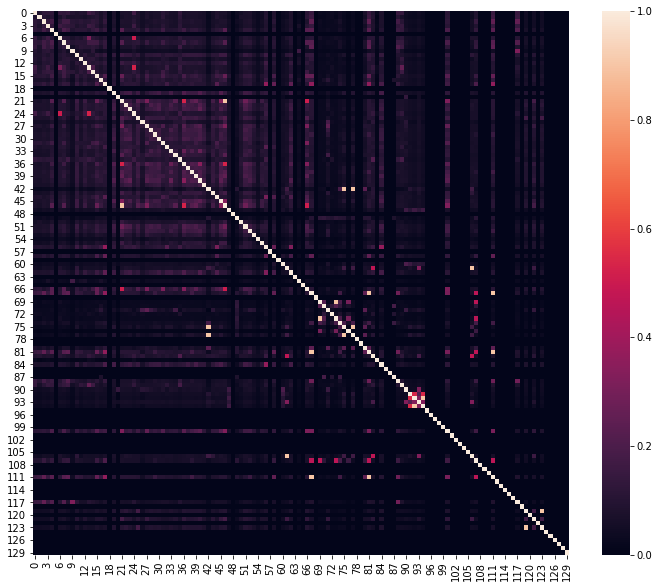

In [64]:
f, (ax1) = plt.subplots(figsize=(12,10),nrows=1)
sns.heatmap(similarity_matrix, annot=False, ax=ax1)
f.savefig("similarity_matrix.jpg",dpi=100)